In [135]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # data visualization library

import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
mpl.style.use('ggplot') # optional: for ggplot-like style
import folium
from scipy import stats  #for p value
  
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/sea-building-energy-benchmarking/2016-building-energy-benchmarking.csv
/kaggle/input/sea-building-energy-benchmarking/socrata_metadata_2016-building-energy-benchmarking.json
/kaggle/input/sea-building-energy-benchmarking/2015-building-energy-benchmarking.csv
/kaggle/input/sea-building-energy-benchmarking/socrata_metadata_2015-building-energy-benchmarking.json


In [136]:
# Reading the CSV file 
file_name_2016 = "/kaggle/input/sea-building-energy-benchmarking/2016-building-energy-benchmarking.csv"
file_name_2015 = "/kaggle/input/sea-building-energy-benchmarking/2015-building-energy-benchmarking.csv"
df = pd.read_csv(file_name_2016)
df1 = pd.read_csv(file_name_2015)
display(df.head())  #allows to print the dataframes 

#pd.set_option('max_columns', 40)        # set the max columns to be displayed
#pd.set_option('display.max_colwidth',20)
#pd.reset_option('all')         # resets every parameters
print(pd.options.display.max_colwidth)
print(pd.options.display.max_columns)
print(pd.options.display.max_rows)
df1.head()

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,...,Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
0,1,2016,NonResidential,Hotel,Mayflower park hotel,405 Olive way,Seattle,WA,98101.0,0659000030,...,1.156514e+06,3946027.0,12764.52930,1276453.0,False,NaN,Compliant,NaN,249.98,2.83
1,2,2016,NonResidential,Hotel,Paramount Hotel,724 Pine street,Seattle,WA,98101.0,0659000220,...,9.504252e+05,3242851.0,51450.81641,5145082.0,False,NaN,Compliant,NaN,295.86,2.86
2,3,2016,NonResidential,Hotel,5673-The Westin Seattle,1900 5th Avenue,Seattle,WA,98101.0,0659000475,...,1.451544e+07,49526664.0,14938.00000,1493800.0,False,NaN,Compliant,NaN,2089.28,2.19
3,5,2016,NonResidential,Hotel,HOTEL MAX,620 STEWART ST,Seattle,WA,98101.0,0659000640,...,8.115253e+05,2768924.0,18112.13086,1811213.0,False,NaN,Compliant,NaN,286.43,4.67
4,8,2016,NonResidential,Hotel,WARWICK SEATTLE HOTEL (ID8),401 LENORA ST,Seattle,WA,98121.0,0659000970,...,1.573449e+06,5368607.0,88039.98438,8803998.0,False,NaN,Compliant,NaN,505.01,2.88


50
20
60


,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,TaxParcelIdentificationNumber,Location,CouncilDistrictCode,Neighborhood,YearBuilt,...,GHGEmissionsIntensity(kgCO2e/ft2),DefaultData,Comment,ComplianceStatus,Outlier,2010 Census Tracts,Seattle Police Department Micro Community Policing Plan Areas,City Council Districts,SPD Beats,Zip Codes
0,1,2015,NonResidential,Hotel,MAYFLOWER PARK HOTEL,659000030,"{'latitude': '47.61219025', 'longitude': '-122...",7,DOWNTOWN,1927,...,2.64,No,NaN,Compliant,NaN,NaN,14.0,NaN,31.0,18081
1,2,2015,NonResidential,Hotel,PARAMOUNT HOTEL,659000220,"{'latitude': '47.61310583', 'longitude': '-122...",7,DOWNTOWN,1996,...,2.38,No,NaN,Compliant,NaN,NaN,14.0,NaN,31.0,18081
2,3,2015,NonResidential,Hotel,WESTIN HOTEL,659000475,"{'latitude': '47.61334897', 'longitude': '-122...",7,DOWNTOWN,1969,...,1.92,Yes,NaN,Compliant,NaN,NaN,56.0,NaN,31.0,18081
3,5,2015,NonResidential,Hotel,HOTEL MAX,659000640,"{'latitude': '47.61421585', 'longitude': '-122...",7,DOWNTOWN,1926,...,31.38,No,NaN,Compliant,High Outlier,NaN,56.0,NaN,31.0,18081
4,8,2015,NonResidential,Hotel,WARWICK SEATTLE HOTEL,659000970,"{'latitude': '47.6137544', 'longitude': '-122....",7,DOWNTOWN,1980,...,4.02,No,NaN,Compliant,NaN,NaN,56.0,NaN,31.0,19576


In [137]:
print("Shape of the DataFrame 2016:",df.shape,"\n")
print("Shape of the DataFrame 2015:",df1.shape,"\n")
#df.columns


Shape of the DataFrame 2016: (3376, 46) 

Shape of the DataFrame 2015: (3340, 47) 



In [138]:
df.info()
#df1.info()
#df1.count()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3376 entries, 0 to 3375
Data columns (total 46 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   OSEBuildingID                    3376 non-null   int64  
 1   DataYear                         3376 non-null   int64  
 2   BuildingType                     3376 non-null   object 
 3   PrimaryPropertyType              3376 non-null   object 
 4   PropertyName                     3376 non-null   object 
 5   Address                          3376 non-null   object 
 6   City                             3376 non-null   object 
 7   State                            3376 non-null   object 
 8   ZipCode                          3360 non-null   float64
 9   TaxParcelIdentificationNumber    3376 non-null   object 
 10  CouncilDistrictCode              3376 non-null   int64  
 11  Neighborhood                     3376 non-null   object 
 12  Latitude            

## Some information about various variables
1. PropertyGFATotal : Property Gross floor area
2. NumberofBuildings : No. of building in an allocated ID, (eg: hotel, big complex)
3. SiteEUI(kBtu/sf) : Energy Use Index (EUI) represents kBtu per square foot of conditioned floor area. ( British Thermal Unit(Btu) are used in building energy use tracking and heating system sizing)
4. ENERGYSTARScore: Ranges from 0-100(bad-good),  building’s energy consumption measures up against similar buildings nationwide. Score of 75+ : building is a top performer — and may be eligible for ENERGY STAR certification
5. ListOfAllPropertyUseTypes: (Purpose of using property, eg: hotel, parking,etc)        
6. PrimaryPropertyType: Primary purpose of use
7. Few important variables:'SiteEUIWN(kBtu/sf)','SourceEUIWN(kBtu/sf)','SiteEnergyUseWN(kBtu)','SteamUse(kBtu)','Electricity(kBtu)',
'NaturalGas(kBtu)','GHGEmissionsIntensity'
8. Target Variables: ENERGYSTARScore, TotalGHGEmissions

<p> &nbsp; </p>
<!-- This is commented -->  


In [139]:
# counts the number of times each data has appeared in a column

#print(df['PropertyGFAParking'].value_counts())
#df[['PropertyGFAParking','PropertyGFATotal']]
#print(df['BuildingType'].value_counts())
df['ListOfAllPropertyUseTypes'].value_counts()


Multifamily Housing                                                     866
Multifamily Housing, Parking                                            464
Office                                                                  139
K-12 School                                                             135
Office, Parking                                                         120
                                                                       ... 
Food Sales, Food Service, Medical Office, Multifamily Housing, Other      1
Financial Office, Office, Other, Parking, Restaurant                      1
Non-Refrigerated Warehouse, Office, Restaurant, Retail Store              1
Data Center, Laboratory, Museum, Office, Other, Parking                   1
Data Center, Non-Refrigerated Warehouse, Office                           1
Name: ListOfAllPropertyUseTypes, Length: 466, dtype: int64

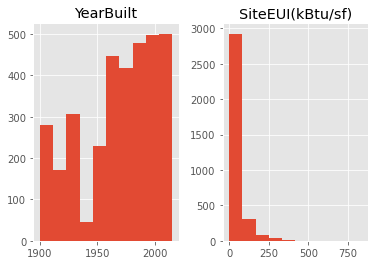

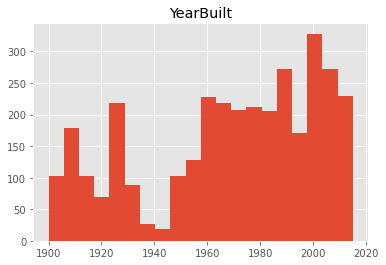

In [140]:
viz = df[['YearBuilt', 'SiteEUI(kBtu/sf)' ]]
viz.hist()
df.hist(column='YearBuilt', bins=20)
plt.show()

In [141]:

df.describe()


,OSEBuildingID,DataYear,ZipCode,CouncilDistrictCode,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,...,SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),Comments,TotalGHGEmissions,GHGEmissionsIntensity
count,3376.000000,3376.0,3360.000000,3376.000000,3376.000000,3376.000000,3376.000000,3368.000000,3376.000000,3.376000e+03,...,3.371000e+03,3.370000e+03,3.367000e+03,3.367000e+03,3.367000e+03,3.367000e+03,3.367000e+03,0.0,3367.000000,3367.000000
mean,21208.991114,2016.0,98116.949107,4.439277,47.624033,-122.334795,1968.573164,1.106888,4.709123,9.483354e+04,...,5.403667e+06,5.276726e+06,2.745959e+05,1.086639e+06,3.707612e+06,1.368505e+04,1.368505e+06,NaN,119.723971,1.175916
std,12223.757015,0.0,18.615205,2.120625,0.047758,0.027203,33.088156,2.108402,5.494465,2.188376e+05,...,2.161063e+07,1.593879e+07,3.912173e+06,4.352478e+06,1.485066e+07,6.709781e+04,6.709781e+06,NaN,538.832227,1.821452
min,1.000000,2016.0,98006.000000,1.000000,47.499170,-122.414250,1900.000000,0.000000,0.000000,1.128500e+04,...,0.000000e+00,0.000000e+00,0.000000e+00,-3.382680e+04,-1.154170e+05,0.000000e+00,0.000000e+00,NaN,-0.800000,-0.020000
25%,19990.750000,2016.0,98105.000000,3.000000,47.599860,-122.350662,1948.000000,1.000000,2.000000,2.848700e+04,...,9.251286e+05,9.701822e+05,0.000000e+00,1.874229e+05,6.394870e+05,0.000000e+00,0.000000e+00,NaN,9.495000,0.210000
50%,23112.000000,2016.0,98115.000000,4.000000,47.618675,-122.332495,1975.000000,1.000000,4.000000,4.417500e+04,...,1.803753e+06,1.904452e+06,0.000000e+00,3.451299e+05,1.177583e+06,3.237538e+03,3.237540e+05,NaN,33.920000,0.610000
75%,25994.250000,2016.0,98122.000000,7.000000,47.657115,-122.319407,1997.000000,1.000000,5.000000,9.099200e+04,...,4.222455e+06,4.381429e+06,0.000000e+00,8.293178e+05,2.829632e+06,1.189033e+04,1.189034e+06,NaN,93.940000,1.370000
max,50226.000000,2016.0,98272.000000,7.000000,47.733870,-122.220966,2015.000000,111.000000,99.000000,9.320156e+06,...,8.739237e+08,4.716139e+08,1.349435e+08,1.925775e+08,6.570744e+08,2.979090e+06,2.979090e+08,NaN,16870.980000,34.090000


In [142]:
df[["ENERGYSTARScore"]]

,ENERGYSTARScore
0,60.0
1,61.0
2,43.0
3,56.0
4,75.0
...,...
3371,46.0
3372,NaN
3373,NaN
3374,NaN


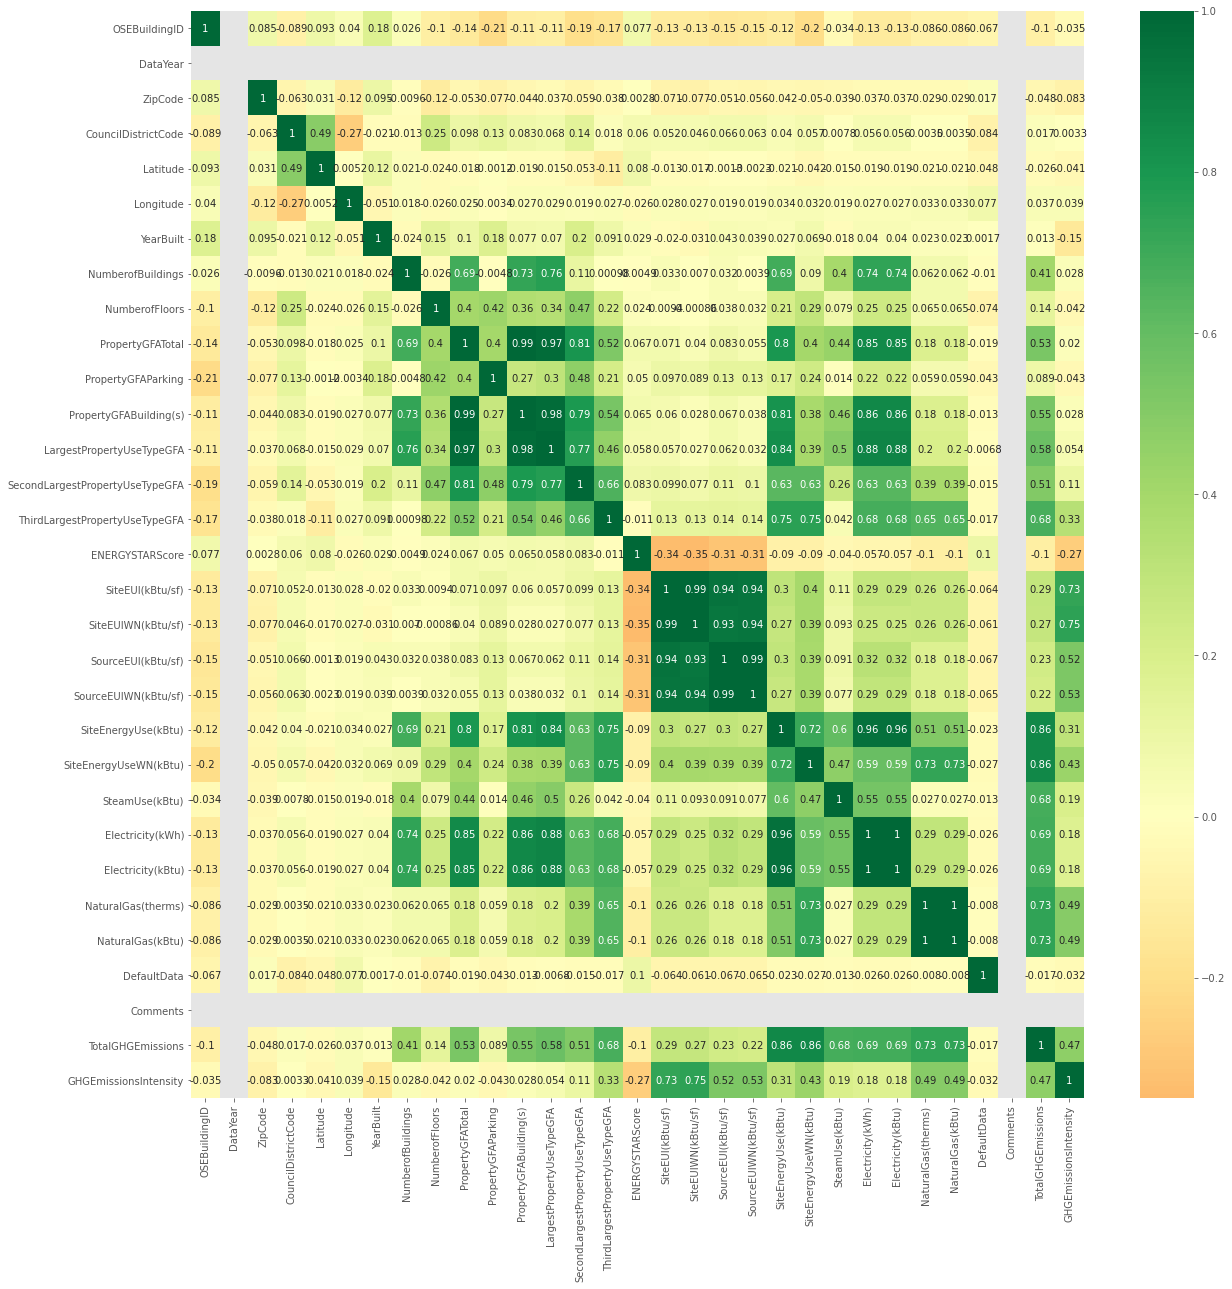

In [143]:
# correlation matrix

fig, ax = plt.subplots(figsize=(20,20))         # Sample figsize in inches
sns.heatmap(df.corr(), annot=True , ax = ax , cmap = 'RdYlGn', center=0)     # annot : shows value too

#df.corr()


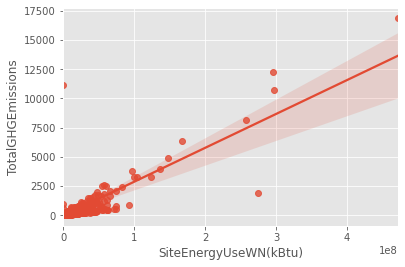

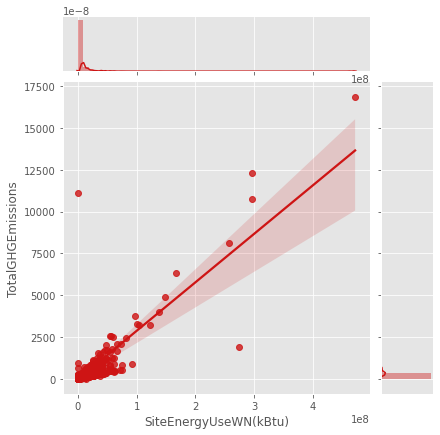

In [144]:
display(sns.regplot(x="SiteEnergyUseWN(kBtu)", y="TotalGHGEmissions", data=df))
sns.jointplot(df.loc[:,'SiteEnergyUseWN(kBtu)'], df.loc[:,'TotalGHGEmissions'], kind="regg", color="#ce1414")

# Data Wrangling



In [145]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3376 entries, 0 to 3375
Data columns (total 46 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   OSEBuildingID                    3376 non-null   int64  
 1   DataYear                         3376 non-null   int64  
 2   BuildingType                     3376 non-null   object 
 3   PrimaryPropertyType              3376 non-null   object 
 4   PropertyName                     3376 non-null   object 
 5   Address                          3376 non-null   object 
 6   City                             3376 non-null   object 
 7   State                            3376 non-null   object 
 8   ZipCode                          3360 non-null   float64
 9   TaxParcelIdentificationNumber    3376 non-null   object 
 10  CouncilDistrictCode              3376 non-null   int64  
 11  Neighborhood                     3376 non-null   object 
 12  Latitude            

In [146]:
#Few analysis in order to deal efficiently with missing value
    
display(df[[ 'Electricity(kWh)' , 'Electricity(kBtu)']].corr())
df[['NaturalGas(therms)', 'NaturalGas(kBtu)']].corr()
# hence keep only one and the other can be dropped

,Electricity(kWh),Electricity(kBtu)
Electricity(kWh),1.0,1.0
Electricity(kBtu),1.0,1.0


,NaturalGas(therms),NaturalGas(kBtu)
NaturalGas(therms),1.0,1.0
NaturalGas(kBtu),1.0,1.0


In [147]:
# remove the unnecessary columns 

df.drop(['Electricity(kWh)','NaturalGas(therms)', 'TaxParcelIdentificationNumber',"ListOfAllPropertyUseTypes", "SecondLargestPropertyUseType" ,"SecondLargestPropertyUseTypeGFA" , "ThirdLargestPropertyUseType" , 
        "ThirdLargestPropertyUseTypeGFA" , "ZipCode","Comments", "Outlier" ,"YearsENERGYSTARCertified" , "DefaultData"], axis = 1, inplace=True)
df.head()



,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,CouncilDistrictCode,Neighborhood,...,SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kBtu),NaturalGas(kBtu),ComplianceStatus,TotalGHGEmissions,GHGEmissionsIntensity
0,1,2016,NonResidential,Hotel,Mayflower park hotel,405 Olive way,Seattle,WA,7,DOWNTOWN,...,182.500000,189.000000,7226362.5,7456910.0,2003882.00,3946027.0,1276453.0,Compliant,249.98,2.83
1,2,2016,NonResidential,Hotel,Paramount Hotel,724 Pine street,Seattle,WA,7,DOWNTOWN,...,176.100006,179.399994,8387933.0,8664479.0,0.00,3242851.0,5145082.0,Compliant,295.86,2.86
2,3,2016,NonResidential,Hotel,5673-The Westin Seattle,1900 5th Avenue,Seattle,WA,7,DOWNTOWN,...,241.899994,244.100006,72587024.0,73937112.0,21566554.00,49526664.0,1493800.0,Compliant,2089.28,2.19
3,5,2016,NonResidential,Hotel,HOTEL MAX,620 STEWART ST,Seattle,WA,7,DOWNTOWN,...,216.199997,224.000000,6794584.0,6946800.5,2214446.25,2768924.0,1811213.0,Compliant,286.43,4.67
4,8,2016,NonResidential,Hotel,WARWICK SEATTLE HOTEL (ID8),401 LENORA ST,Seattle,WA,7,DOWNTOWN,...,211.399994,215.600006,14172606.0,14656503.0,0.00,5368607.0,8803998.0,Compliant,505.01,2.88


In [148]:
# converting the data type
# eg. year from int to obj
#df[['LargestPropertyUseType']].value_counts()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3376 entries, 0 to 3375
Data columns (total 33 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   OSEBuildingID              3376 non-null   int64  
 1   DataYear                   3376 non-null   int64  
 2   BuildingType               3376 non-null   object 
 3   PrimaryPropertyType        3376 non-null   object 
 4   PropertyName               3376 non-null   object 
 5   Address                    3376 non-null   object 
 6   City                       3376 non-null   object 
 7   State                      3376 non-null   object 
 8   CouncilDistrictCode        3376 non-null   int64  
 9   Neighborhood               3376 non-null   object 
 10  Latitude                   3376 non-null   float64
 11  Longitude                  3376 non-null   float64
 12  YearBuilt                  3376 non-null   int64  
 13  NumberofBuildings          3368 non-null   float

In [149]:
# replaces the missing values with mean

df['NumberofBuildings'].value_counts()

replace_mean_list = ['ENERGYSTARScore', 'SiteEUI(kBtu/sf)', 'SiteEUIWN(kBtu/sf)',
       'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)', 'SiteEnergyUse(kBtu)',
       'SiteEnergyUseWN(kBtu)', 'SteamUse(kBtu)', 'Electricity(kBtu)',
       'NaturalGas(kBtu)', 'TotalGHGEmissions',
       'GHGEmissionsIntensity' ,'LargestPropertyUseTypeGFA' ]

for i in replace_mean_list:
    df[i].fillna(df[i].mean(), inplace=True)

df['NumberofBuildings'].fillna(df['NumberofBuildings'].median(), inplace=True)
df['LargestPropertyUseType'].fillna('Multifamily Housing',inplace=True)



In [150]:
df['LargestPropertyUseType'].mode()

0    Multifamily Housing
dtype: object

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3376 entries, 0 to 3375
Data columns (total 33 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   OSEBuildingID              3376 non-null   int64  
 1   DataYear                   3376 non-null   int64  
 2   BuildingType               3376 non-null   object 
 3   PrimaryPropertyType        3376 non-null   object 
 4   PropertyName               3376 non-null   object 
 5   Address                    3376 non-null   object 
 6   City                       3376 non-null   object 
 7   State                      3376 non-null   object 
 8   CouncilDistrictCode        3376 non-null   int64  
 9   Neighborhood               3376 non-null   object 
 10  Latitude                   3376 non-null   float64
 11  Longitude                  3376 non-null   float64
 12  YearBuilt                  3376 non-null   int64  
 13  NumberofBuildings          3376 non-null   float

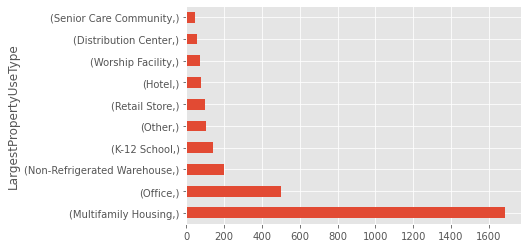

In [151]:
# plots the distribution of LargestPropertyUseType
df.info()
#df['LargestPropertyUseType'].mode() 
df[['LargestPropertyUseType']].value_counts()[:10].plot(kind='barh')

# Few Analysis after Cleaning

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f86079e0950>]],
      dtype=object)

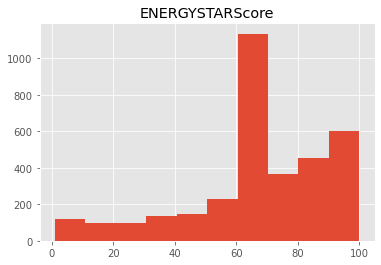

In [152]:
df.hist(column='ENERGYSTARScore', bins=10)

Interpretation: In the EnergyStarScore range 60 -70 , there are majority of buildings 

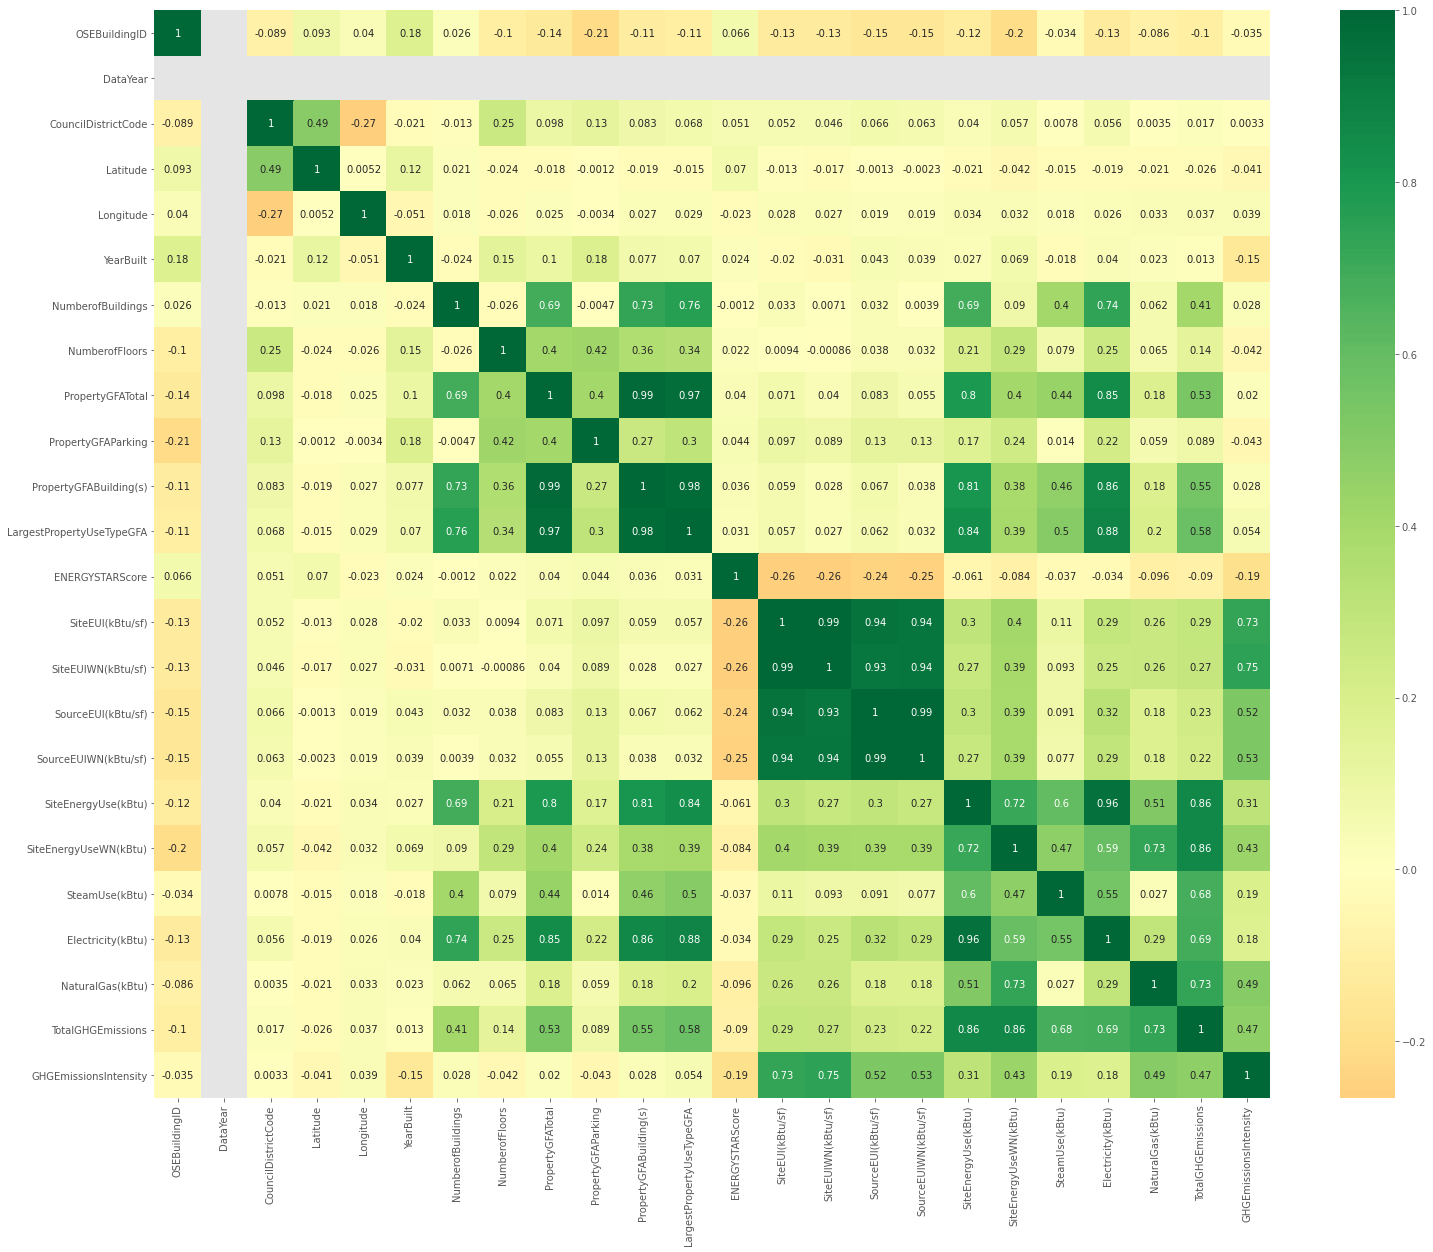

In [153]:
#After Cleaning
#fig, ax = plt.subplots(figsize=(20,20))         # Sample figsize in inches
#sns.heatmap(df.corr(), annot=True , ax = ax)     # annot : shows value too

fig, ax = plt.subplots(figsize=(25,20))         # Sample figsize in inches
sns.heatmap(df.corr(), annot=True , ax = ax , cmap = 'RdYlGn', center=0)     # annot : shows value too

,BuildingType,TotalGHGEmissions
0,NonResidential,249.98
1,NonResidential,295.86
2,NonResidential,2089.28
3,NonResidential,286.43
4,NonResidential,505.01
...,...,...
3371,Nonresidential COS,20.94
3372,Nonresidential COS,32.17
3373,Nonresidential COS,223.54
3374,Nonresidential COS,22.11


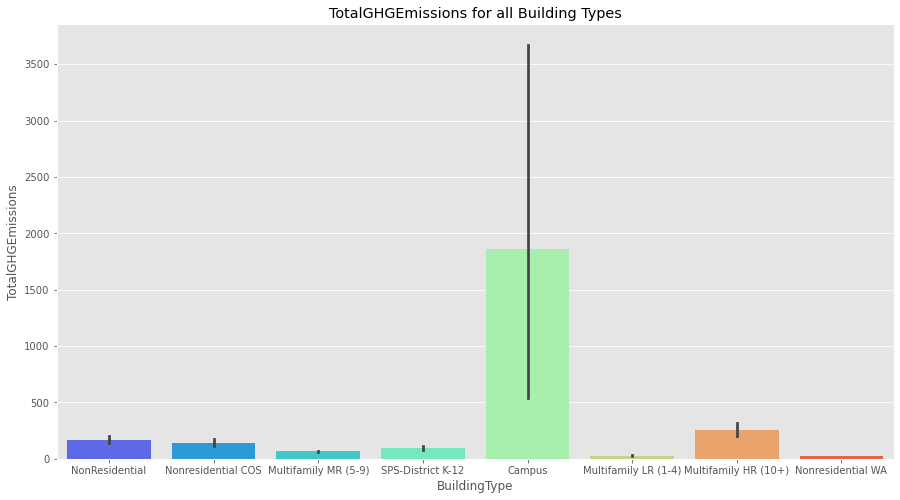

In [154]:

plt.figure(figsize=(15,8))
plt.title('TotalGHGEmissions for all Building Types')
display(df[['BuildingType', 'TotalGHGEmissions']])
sns.barplot(x='BuildingType',y='TotalGHGEmissions',data=df,palette='rainbow')

 Interpretation: Greenhousegas emission per building type is highest in Campuses.

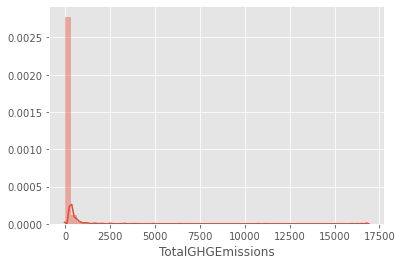

In [155]:
sns.distplot(df['TotalGHGEmissions'])

NonResidential          1460
Multifamily LR (1-4)    1018
Multifamily MR (5-9)     580
Multifamily HR (10+)     110
SPS-District K-12         98
Nonresidential COS        85
Campus                    24
Nonresidential WA          1
Name: BuildingType, dtype: int64

<class 'pandas.core.groupby.generic.DataFrameGroupBy'>


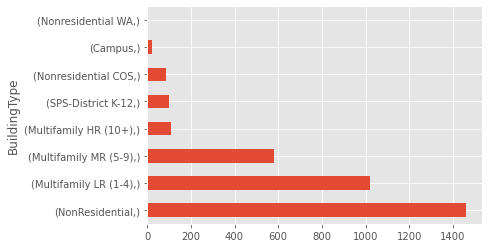

In [156]:
# groupby analysis 
display(df['BuildingType'].value_counts())
df_BuildingType = df.groupby('BuildingType', axis=0).sum()

# note: the output of the groupby method is a `groupby' object. 
# we can not use it further until we apply a function (eg .sum())
print(type(df.groupby('BuildingType', axis=0)))
df[['BuildingType']].value_counts()[:10].plot(kind='barh')



Interpretation: Number of Non-Residential Type of building are highest

Text(0.5, 1, 'TotalGHGEmissions distribution by BuidingType')

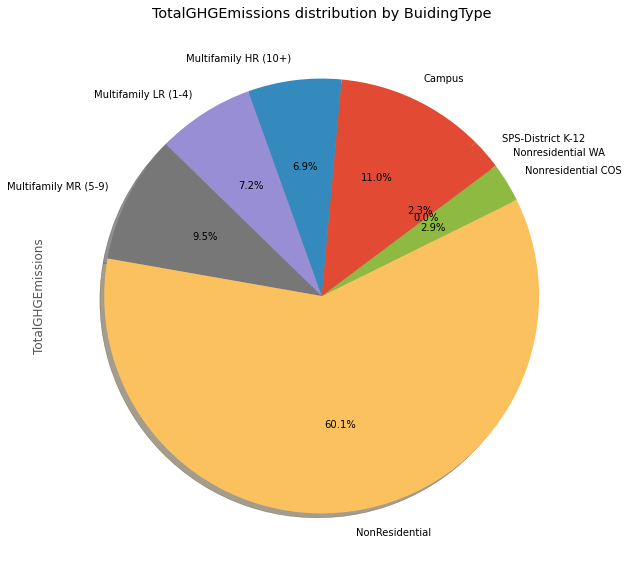

In [157]:
df_BuildingType['TotalGHGEmissions'].plot(kind='pie',
                            figsize=(10, 10),
                            autopct='%1.1f%%', # add in percentages
                            startangle=45,     # start angle 90°
                            shadow=True,       # add shadow      
                            )
plt.title('TotalGHGEmissions distribution by BuidingType', y=1) 

# Hece we can say that NonResidential Type of Building are contributing highest to the Green HOuse Gas Emission

Interpretation: Almost 60% of the Total Greenhousegas emission is emittied by NonResidential Type of Building

Text(0.5, 1, 'NaturalGas(kBtu) distribution by BuidingType')

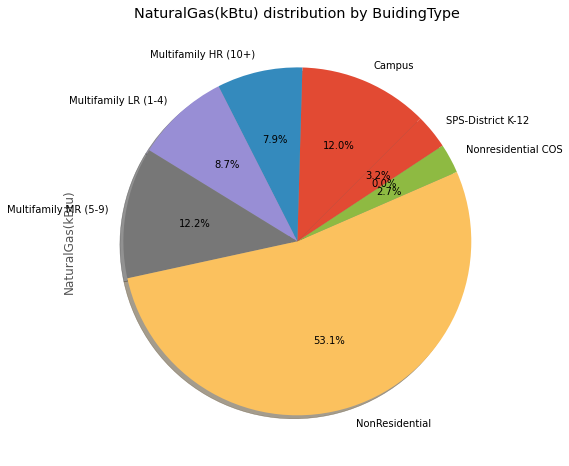

In [158]:

df_BuildingType['NaturalGas(kBtu)'].plot(kind='pie',
                            figsize=(8, 8),
                            autopct='%1.1f%%', # add in percentages
                            startangle=45,     # start angle 90°
                            shadow=True,       # add shadow  
                                           
                           # labels=None,         # turn off labels on pie chart
                           # pctdistance=1.12,    # the ratio between the center of each pie slice and the start of the text generated by autopct 
                            )
plt.title('NaturalGas(kBtu) distribution by BuidingType', y=1) 


In [159]:
df.columns

Index(['OSEBuildingID', 'DataYear', 'BuildingType', 'PrimaryPropertyType',
       'PropertyName', 'Address', 'City', 'State', 'CouncilDistrictCode',
       'Neighborhood', 'Latitude', 'Longitude', 'YearBuilt',
       'NumberofBuildings', 'NumberofFloors', 'PropertyGFATotal',
       'PropertyGFAParking', 'PropertyGFABuilding(s)',
       'LargestPropertyUseType', 'LargestPropertyUseTypeGFA',
       'ENERGYSTARScore', 'SiteEUI(kBtu/sf)', 'SiteEUIWN(kBtu/sf)',
       'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)', 'SiteEnergyUse(kBtu)',
       'SiteEnergyUseWN(kBtu)', 'SteamUse(kBtu)', 'Electricity(kBtu)',
       'NaturalGas(kBtu)', 'ComplianceStatus', 'TotalGHGEmissions',
       'GHGEmissionsIntensity'],
      dtype='object')

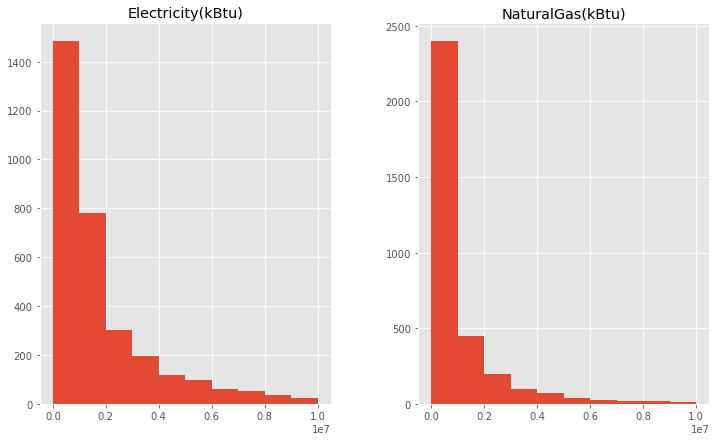

In [169]:
x = df[['Electricity(kBtu)','NaturalGas(kBtu)']]
x.hist(figsize=(12,7), bins = 10 , range=[0,10e6])
plt.show()



In [ ]:
world_map = folium.Map()

# display world map
world_map

In [ ]:
# lat and long of seattle,  latitute is 47.6062, and the longitude is -122.3321   
latitude = 47.6062              
longitude = -122.3321


In [ ]:
# create map and display it
seattle_map = folium.Map(location=[latitude, longitude], zoom_start=12)

# display the map of Seattle
seattle_map

In [ ]:
# instantiate a feature group 
buildings = folium.map.FeatureGroup()

# BuildingID whose data we have
for lat, lng, in zip(df.Latitude, df.Longitude):
    buildings.add_child(
        folium.CircleMarker(
            [lat, lng],
            radius=3, # define how big you want the circle markers to be
            color='yellow',
            fill=True,
            fill_color='blue',
            fill_opacity=0.6
        )
    )

# add buildings to map
seattle_map.add_child(buildings)
# More data available from .

# Model Development

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

y_data = df['TotalGHGEmissions']
x_data = df[['SiteEUIWN(kBtu/sf)', 'SourceEUIWN(kBtu/sf)',
       'SiteEnergyUseWN(kBtu)', 'SteamUse(kBtu)', 'Electricity(kBtu)',
       'NaturalGas(kBtu)','GHGEmissionsIntensity']]

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.10, random_state=1)

print("number of test samples :", x_test.shape[0])
print("number of training samples:",x_train.shape[0])
x_data.head(5)

In [ ]:
lm = LinearRegression()
lm.fit(x_train, y_train)
Y_hat=lm.predict(x_test)


In [ ]:
print ('Coefficients: ', lm.coef_)
print ('Intercept: ' , lm.intercept_)
print('Train score :',lm.score(x_train, y_train))
print('Test score :', lm.score(x_test, y_test) )


In [ ]:

import seaborn as sns
%matplotlib inline 
width = 12
height = 10
plt.figure(figsize=(width, height))

Y_hat=lm.predict(x_train)
ax1 = sns.distplot(df['TotalGHGEmissions'], hist=False, color="r", label="Actual Value")
sns.distplot(Y_hat, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for TotalGHGEmissions')
plt.xlabel('TotalGHGEmissions')
plt.ylabel('Proportion of TotalGHGEmissions')

plt.show()
plt.close()

Interpretation: Build MLR Model is a close estimate of TotalGHGEMsissions 